In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lightgbm import LGBMModel,LGBMClassifier

In [2]:
bd = pd.read_csv('train.csv')
print("Tamanho: " ,bd.shape)
bd.tail()

Tamanho:  (5000000, 3)


,time,signal,open_channels
4999995,499.9996,2.9194,7
4999996,499.9997,2.6980,7
4999997,499.9998,4.5164,8
4999998,499.9999,5.6397,9
4999999,500.0000,5.3792,9


In [3]:
bd_test = pd.read_csv('test.csv')
print("Tamanho: " ,bd_test.shape)
bd_test.head()

Tamanho:  (2000000, 2)


,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


In [4]:
submission = pd.read_csv('sample_submission.csv',dtype={'time':str})

In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
time             float64
signal           float64
open_channels    int64
dtypes: float64(2), int64(1)
memory usage: 114.4 MB


In [6]:
bd.corr()

,time,signal,open_channels
time,1.000000,0.831239,0.569601
signal,0.831239,1.000000,0.801670
open_channels,0.569601,0.801670,1.000000


In [7]:
bd.describe()

,time,signal,open_channels
count,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.500001e+02,1.386246e+00,2.726043e+00
std,1.443376e+02,3.336219e+00,2.665051e+00
min,1.000000e-04,-5.796500e+00,0.000000e+00
25%,1.250001e+02,-1.594800e+00,1.000000e+00
50%,2.500000e+02,1.124000e+00,2.000000e+00
75%,3.750000e+02,3.690100e+00,4.000000e+00
max,5.000000e+02,1.324400e+01,1.000000e+01


In [8]:
bd.isna().sum()

time             0
signal           0
open_channels    0
dtype: int64

In [9]:
qtd_channels = bd['open_channels'].value_counts()
qtd_channels

0     1240152
1      985865
3      668609
2      553924
4      403410
5      277877
7      265015
8      245183
6      188112
9      136120
10      35733
Name: open_channels, dtype: int64

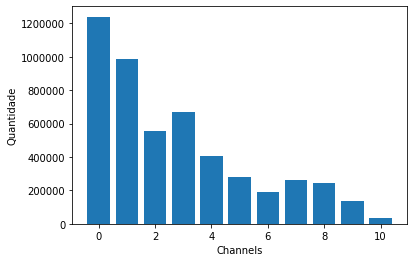

In [10]:
import matplotlib.pyplot as plt

plt.bar(qtd_channels.index,qtd_channels)
plt.xlabel('Channels')
plt.ylabel('Quantidade')
plt.show()

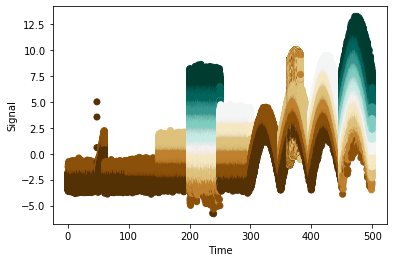

In [11]:
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.scatter(bd['time'],bd['signal'],c=bd['open_channels'],cmap='BrBG')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.style.use('ggplot')
plt.show()

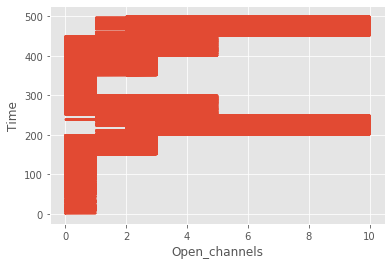

In [12]:
plt.plot(bd['open_channels'],bd['time'])
plt.xlabel('Open_channels')
plt.ylabel('Time')
plt.style.use('seaborn-pastel')
plt.show()

In [13]:
bd['signal_mean5000'] = bd['signal'].shift(1).rolling(5000).mean()
bd_test['signal_mean5000'] = bd_test['signal'].shift(1).rolling(5000).mean()

bd['signal_std5000'] = bd['signal'].shift(1).rolling(5000).std()
bd_test['signal_std5000'] = bd_test['signal'].shift(1).rolling(5000).std()

In [14]:
bd['signal_mean5000'].fillna(bd['signal_mean5000'].mean(),inplace=True)
bd_test['signal_mean5000'].fillna(bd_test['signal_mean5000'].mean(),inplace=True)

bd['signal_std5000'].fillna(bd['signal_std5000'].mean(),inplace=True)
bd_test['signal_std5000'].fillna(bd_test['signal_std5000'].mean(),inplace=True)

In [15]:
bd['signal_mean1000'] = bd['signal'].shift(1).rolling(1000).mean()
bd_test['signal_mean1000'] = bd_test['signal'].shift(1).rolling(1000).mean()

bd['signal_std1000'] = bd['signal'].shift(1).rolling(1000).std()
bd_test['signal_std1000'] = bd_test['signal'].shift(1).rolling(1000).std()

In [16]:
bd['signal_mean1000'].fillna(bd['signal_mean1000'].mean(),inplace=True)
bd_test['signal_mean1000'].fillna(bd_test['signal_mean1000'].mean(),inplace=True)

bd['signal_std1000'].fillna(bd['signal_std1000'].mean(),inplace=True)
bd_test['signal_std1000'].fillna(bd_test['signal_std1000'].mean(),inplace=True)

In [17]:
bd['signal_mean100'] = bd['signal'].shift(1).rolling(100).mean()
bd_test['signal_mean100'] = bd_test['signal'].shift(1).rolling(100).mean()

bd['signal_std100'] = bd['signal'].shift(1).rolling(100).std()
bd_test['signal_std100'] = bd_test['signal'].shift(1).rolling(100).std()

In [18]:
bd['signal_mean100'].fillna(bd['signal_mean100'].mean(),inplace=True)
bd_test['signal_mean100'].fillna(bd_test['signal_mean100'].mean(),inplace=True)

bd['signal_std100'].fillna(bd['signal_std100'].mean(),inplace=True)
bd_test['signal_std100'].fillna(bd_test['signal_std100'].mean(),inplace=True)

In [19]:
bd.head()

,time,signal,open_channels,signal_mean5000,signal_std5000,signal_mean1000,signal_std1000,signal_mean100,signal_std100
0,0.0001,-2.7600,0,1.387212,1.011834,1.386417,0.974009,1.386256,0.840257
1,0.0002,-2.8557,0,1.387212,1.011834,1.386417,0.974009,1.386256,0.840257
2,0.0003,-2.4074,0,1.387212,1.011834,1.386417,0.974009,1.386256,0.840257
3,0.0004,-3.1404,0,1.387212,1.011834,1.386417,0.974009,1.386256,0.840257
4,0.0005,-3.1525,0,1.387212,1.011834,1.386417,0.974009,1.386256,0.840257


#### Ideia: Dividir o banco antes e depois dos 300

In [20]:
before300 = bd[bd['time'] <= 300]
after300 = bd[bd['time'] > 300]

In [21]:
from sklearn.metrics import classification_report

In [22]:
recursos = ['signal','signal_mean5000','signal_std5000','signal_mean1000','signal_std1000','signal_mean100','signal_std100']

In [23]:
X = pd.DataFrame(before300,columns=recursos)
y = pd.DataFrame(before300,columns=['open_channels'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
params = {
    'random_state':0,
    'boosting_type': 'rf',
    'eta':0.1, 
    'n_estimators':3, 
    'max_depth':8,
    'objective':'softmax',
    'silent':False,
    'class_weight':'balanced',
    'bagging_freq': 1,
    'bagging_fraction': 0.01
}

model = LGBMClassifier(**params)
model.fit(X_train, y_train.values.reshape(-1), eval_set=(X_test, y_test.values.reshape(-1,)), eval_metric='multiclass',early_stopping_rounds=10, verbose=True)

[1]	valid_0's multi_logloss: 0.168869
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.156425
[3]	valid_0's multi_logloss: 0.152002
Did not meet early stopping. Best iteration is:
[3]	valid_0's multi_logloss: 0.152002


LGBMClassifier(bagging_fraction=0.01, bagging_freq=1, boosting_type='rf',
               class_weight='balanced', colsample_bytree=1.0, eta=0.1,
               importance_type='split', learning_rate=0.1, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3, n_jobs=-1, num_leaves=31, objective='softmax',
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
pred = model.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    219625
           1       0.99      0.98      0.98    102752
           2       0.98      0.97      0.98     55656
           3       0.97      0.98      0.97     66081
           4       0.96      0.96      0.96     40461
           5       0.93      0.94      0.93     27378
           6       0.90      0.84      0.87     19794
           7       0.87      0.87      0.87     26499
           8       0.85      0.90      0.87     23264
           9       0.84      0.86      0.85     13634
          10       0.95      0.73      0.82      4856

    accuracy                           0.96    600000
   macro avg       0.93      0.91      0.92    600000
weighted avg       0.96      0.96      0.96    600000

